In [9]:
from __future__ import print_function    # (at top of module)
import warnings
warnings.filterwarnings('always')
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.pyplot import figure
import math
import seaborn as sns
import io, os, sys, types
from pandas.plotting import table
import six

In [10]:
# Read the data from the file
data = pd.read_csv('Data/data_500_entries_youtube.csv')
print("Number of entries in original data: " + str(len(data.index)))
data = data.sample(frac=1).reset_index(drop=True)
data.head()

Number of entries in original data: 570


,song_id,song_title,artist,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration,loudness,valence,mode,youtube_view_count,youtube_video_title
0,spotify:track:45sVRPegWSGpIcsrDoaaCY,En Peligro de Extinción,[La Adictiva Banda San José de Mesillas],76,0.483,0.241,123.566,0.0281,0.219,0.000002,4,0.709,0,234198,-3.734,0.834,1,161858006,La Adictiva - En Peligro De Extinción
1,spotify:track:7apizLyhMRutg3ccXvr2qv,Hurt Somebody,"[Noah Kahan, Julia Michaels]",62,0.559,0.262,114.983,0.3130,0.338,0.000000,4,0.633,6,168640,-5.135,0.473,1,4212976,Noah Kahan Julia Michaels - Hurt Somebody (Audio)
2,spotify:track:2ijef6ni2amuunRoKTlgww,Sin Pijama,"[Becky G, Natti Natasha]",90,0.745,0.104,94.014,0.0464,0.354,0.000029,4,0.791,11,188560,-3.695,0.820,0,1071141995,Becky G Natti Natasha - Sin Pijama (Video Ofic...
3,spotify:track:6DMXPshekQJR7uOMj0103y,Butterflies,"[AJ Tracey, Not3s]",73,0.685,0.115,103.949,0.1250,0.259,0.000003,4,0.761,5,224000,-9.796,0.596,0,20658328,AJ Tracey - Butterflies (ft. Not3s)
4,spotify:track:6GTCOWvhjvdk4pwlfrSjNO,Ne è valsa la pena (feat. Ghali),"[Capo Plaza, Ghali]",71,0.654,0.231,120.388,0.2180,0.115,0.000000,5,0.593,5,234600,-4.509,0.405,0,5617736,Ne è valsa la pena (feat. Ghali)


In [11]:
print(data.columns)

Index(['song_id', 'song_title', 'artist', 'popularity', 'energy', 'liveness',
       'tempo', 'speechiness', 'acousticness', 'instrumentalness',
       'time_signature', 'danceability', 'key', 'duration', 'loudness',
       'valence', 'mode', 'youtube_view_count', 'youtube_video_title'],
      dtype='object')


In [12]:
data.describe()

,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration,loudness,valence,mode,youtube_view_count
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,76.496491,0.657613,0.177728,122.800695,0.130653,0.251484,0.010485,3.984211,0.702096,5.222807,202636.614035,-6.065332,0.521494,0.573684,7.596583e+07
std,8.981380,0.160919,0.155160,29.437194,0.107296,0.229787,0.072553,0.261327,0.131463,3.584458,39236.547458,2.197471,0.215014,0.494975,1.708684e+08
min,51.000000,0.093500,0.022200,64.934000,0.025600,0.000046,0.000000,1.000000,0.264000,0.000000,90933.000000,-15.662000,0.039000,0.000000,4.270000e+02
25%,70.000000,0.559000,0.091925,99.940250,0.048600,0.065825,0.000000,4.000000,0.618250,1.000000,181178.250000,-7.392000,0.357250,0.000000,3.028858e+06
50%,76.000000,0.675500,0.116000,120.695500,0.086250,0.186500,0.000000,4.000000,0.720500,6.000000,199442.000000,-5.823000,0.520000,1.000000,1.848132e+07
75%,83.000000,0.773750,0.197750,142.985750,0.188750,0.371000,0.000010,4.000000,0.797000,8.000000,219419.250000,-4.586000,0.699500,1.000000,7.062040e+07
max,100.000000,0.984000,0.985000,203.911000,0.530000,0.989000,0.905000,5.000000,0.975000,11.000000,417920.000000,-0.787000,0.960000,1.000000,1.956582e+09


Number of examples >= 50 popularity: 570-> 100.0%
Number of examples >= 60 popularity: 558-> 97.89473684210526%
Number of examples >= 70 popularity: 446-> 78.24561403508773%
Number of examples >= 80 popularity: 197-> 34.56140350877193%
Number of examples >= 90 popularity: 55-> 9.649122807017545%
Number of examples >= 100 popularity: 1-> 0.17543859649122806%


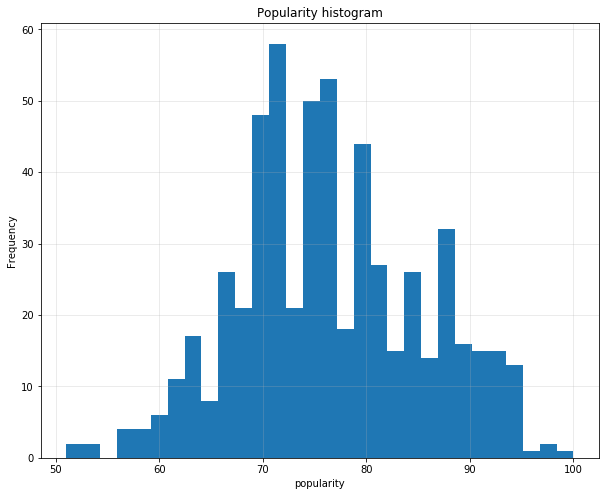

In [13]:
N = len(data.index)
d = len(data.columns) - 2
for i in range(50, 101, 10):
    no_examples = len(data[data.popularity >= i].index)
    per_examples = 100.0 * no_examples/N
    print("Number of examples >= " + str(i) 
          + " popularity: " + str(no_examples) 
          + "-> " + str(per_examples) +"%")
data['popularity'].plot.hist(bins=30, rwidth=10,figsize=(10,8))
plt.xlabel('popularity')
plt.title("Popularity histogram")
plt.grid(alpha=0.3)

In [23]:
from project_modules import *
final_data = label_data(data, 89)

Number of popular examples after thresholding :  55
Number of not popular examples after thresholding :  515


In [24]:
final_data.drop(['song_id', 'song_title', 'artist', 'popularity','youtube_view_count', 'youtube_video_title'], 1, inplace=True)

In [25]:
# X will be our examples and y will be our labels
X = np.array(final_data.drop('is_popular', axis=1))
y = np.array(final_data['is_popular'])
print(X)
print()
print()
print(y)

# SKLEARN DATASET
# from sklearn import datasets
# data = datasets.load_breast_cancer()
# X = np.array(data.data)
# y= np.array(data.target)
# print(X)

[[ 4.83000e-01  2.41000e-01  1.23566e+02 ... -3.73400e+00  8.34000e-01
   1.00000e+00]
 [ 5.59000e-01  2.62000e-01  1.14983e+02 ... -5.13500e+00  4.73000e-01
   1.00000e+00]
 [ 7.45000e-01  1.04000e-01  9.40140e+01 ... -3.69500e+00  8.20000e-01
   0.00000e+00]
 ...
 [ 3.14000e-01  1.52000e-01  1.26921e+02 ... -8.58000e+00  2.95000e-01
   1.00000e+00]
 [ 6.28000e-01  8.43000e-02  1.30076e+02 ... -5.59600e+00  2.81000e-01
   1.00000e+00]
 [ 5.42000e-01  2.47000e-01  1.05005e+02 ... -7.90000e+00  2.85000e-01
   0.00000e+00]]


[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0

In [26]:
from sklearn import preprocessing
COLUMNS_TO_SCALE = ["energy", "liveness", "tempo", 
                    "speechiness", "acousticness", "instrumentalness", 
                    "time_signature", "danceability", "key", 
                    "duration", "loudness", "valence", "mode"]
#COLUMNS_TO_SCALE = ["energy", "tempo","loudness", "valence"]

# Keep data in a temp variable for testing
#scaled_data = scale_data_standardize(X, COLUMNS_TO_SCALE)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
# Plots to see the difference before/after scaling
# plt.subplot(1,2,1)
# plt.plot(data['duration'])
# plt.title("Duration before scaling")

# plt.subplot(1,2,2)
# plt.plot(scaled_data['duration'])
# plt.title("Duration after scaling")
# plt.tight_layout()
# plt.show()

# Copy data back
X = scaler.transform(X)

#Just to check that everything is fine
X.mean(axis=0)

array([-6.88727827e-16, -7.79103877e-17,  5.11092143e-16,  1.86984930e-17,
        9.97252962e-17, -3.11641551e-18, -6.66912919e-16,  8.57014265e-17,
        1.13749166e-16, -1.37122282e-16,  1.55820775e-16, -3.08525135e-16,
        4.36298171e-17])

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, KFold
from sklearn.model_selection import cross_val_score

In [28]:
k_range = list(range(1, 20, 2))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=KFold(n_splits=10), scoring='roc_auc')
    k_scores.append(scores.mean())
print(k_scores)

[0.49994083880931833, 0.45631267727216673, 0.5399181117590293, 0.5523430792652491, 0.5874948457719916, 0.5686393829020078, 0.6041571945339981, 0.6050956929592242, 0.6091524922337908, 0.6101258289828859]


Text(0, 0.5, 'CV mean F1 score')

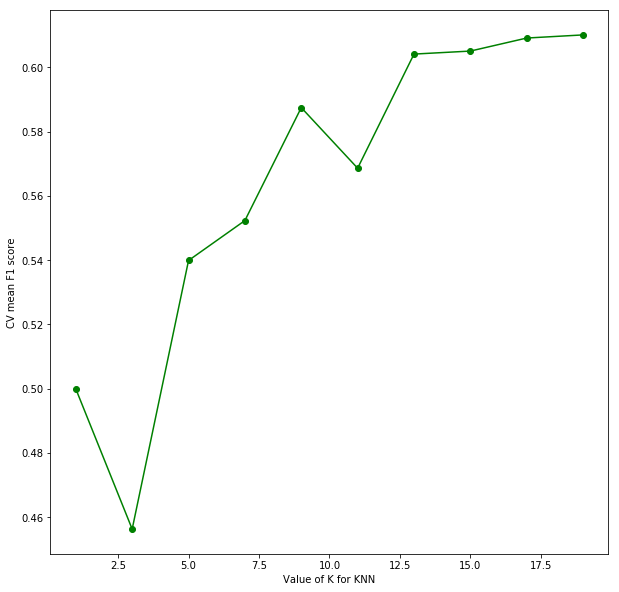

In [29]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, 'go-')
plt.xlabel('Value of K for KNN')
plt.ylabel('CV mean F1 score')

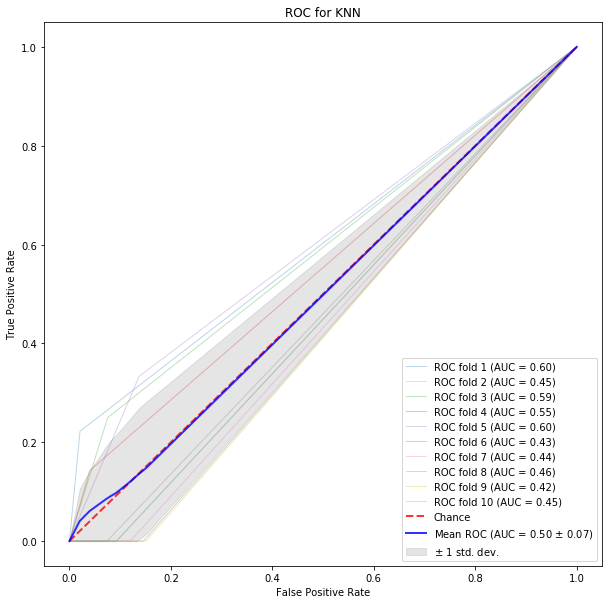

Accuracy mean:  0.8280701754385966

F1 mean:  0.8296257949261416


In [30]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
nbrs = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=10)
X = np.array(X)
y = np.array(y)
tprs=[]
f1s = []
aucs=[]
accs=[]
i=0
mean_fpr = np.linspace(0, 1, 100)
for train, test in cv.split(X, y):
    probas_ = nbrs.fit(X[train], y[train]).predict_proba(X[test])
    predicts = nbrs.predict(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    conf_matrix = confusion_matrix(y[test], predicts)
    #roc_auc = auc(fpr, tpr)
    roc_auc = roc_auc_score(y[test], probas_[:, 1], average="weighted")
    aucs.append(roc_auc)
    f1s.append(f1_score(y[test], predicts, average="weighted"))
    accs.append(accuracy_score(y[test], predicts))
    i += 1
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN')
plt.legend(loc="lower right")
plt.show()

print("Accuracy mean: ",np.mean(accs))
print()
print("F1 mean: ", np.mean(f1s))